## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
print(len(combined_df["Mouse ID"].unique()))

249


In [3]:
# Create a unique record id with Mouse ID and Timepoint
combined_df["UI"]=combined_df["Mouse ID"] + combined_df["Timepoint"].astype(str)
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),UI
0,b128,0,45.0,0,Capomulin,Female,9,22,b1280
1,f932,0,45.0,0,Ketapril,Male,15,29,f9320
2,g107,0,45.0,0,Ketapril,Female,2,29,g1070
3,a457,0,45.0,0,Ketapril,Female,11,30,a4570
4,c819,0,45.0,0,Ketapril,Male,21,25,c8190


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grp_ui_df=combined_df.groupby(["UI"])
mouse_id=grp_ui_df["Mouse ID"].min()
records=grp_ui_df["Mouse ID"].count()

count_df = pd.DataFrame({"Mouse ID":mouse_id,"record_count":records})

dup_mouseid_df = count_df.loc[count_df["record_count"] > 1,:]

dup_mouseid_df

,Mouse ID,record_count
UI,,
g9890,g989,2
g98910,g989,2
g98915,g989,2
g98920,g989,2
g9895,g989,2


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

analysis_df=combined_df.loc[combined_df["Mouse ID"] != "g989",:] 

analysis_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),UI
0,b128,0,45.0,0,Capomulin,Female,9,22,b1280
1,f932,0,45.0,0,Ketapril,Male,15,29,f9320
2,g107,0,45.0,0,Ketapril,Female,2,29,g1070
3,a457,0,45.0,0,Ketapril,Female,11,30,a4570
4,c819,0,45.0,0,Ketapril,Male,21,25,c8190


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(analysis_df["Mouse ID"].unique()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
grp_reg_df=analysis_df.groupby(["Drug Regimen"])

mean_vol=grp_reg_df["Tumor Volume (mm3)"].mean()
median_vol=grp_reg_df["Tumor Volume (mm3)"].median()
var_vol=grp_reg_df["Tumor Volume (mm3)"].var()
std_vol=grp_reg_df["Tumor Volume (mm3)"].std()
sem_vol=grp_reg_df["Tumor Volume (mm3)"].sem()

cnt_UI=grp_reg_df["UI"].count()
regimen=grp_reg_df["Drug Regimen"].min()

reg_stat_df = pd.DataFrame({"Mean": mean_vol,
                            "Median": median_vol,
                            "Variance": var_vol,
                            "Standard Deviation": std_vol,
                            "SEM": sem_vol
                           })

reg_stat_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

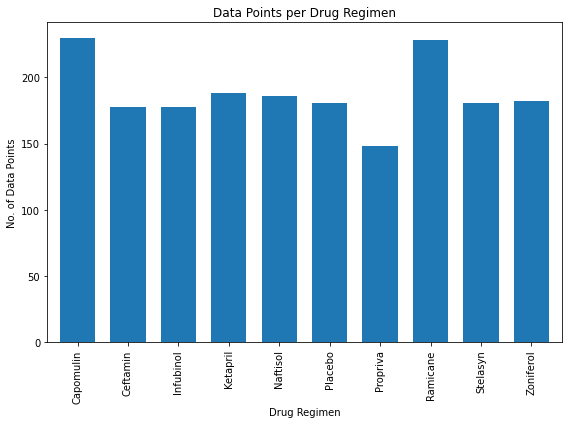

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
records_regimen=pd.DataFrame({"No. of Data Points": cnt_UI, "Drug Regimen": regimen})

records_regimen = records_regimen.reset_index(drop=True)

records_regimen.plot(kind="bar", x="Drug Regimen", y="No. of Data Points", figsize=(8,6) ,width=0.7
                     , title="Data Points per Drug Regimen", legend=False)

plt.xlabel("Drug Regimen")
plt.ylabel("No. of Data Points")


plt.tight_layout()


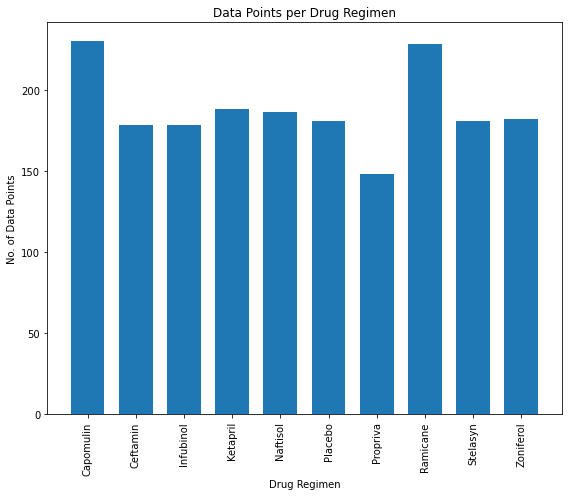

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis=sorted(analysis_df["Drug Regimen"].unique())
y_axis=cnt_UI

plt.figure(figsize=(8,7))
plt.bar(x_axis, y_axis, align="center", width=0.7, label="No. of Data Points")
plt.xticks(x_axis,rotation="vertical")
plt.title("Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Data Points")

plt.tight_layout()



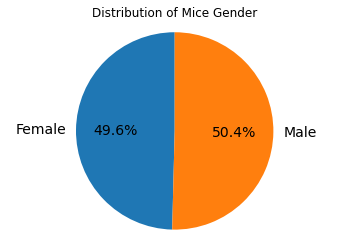

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grp_sex_df=analysis_df.groupby(["Sex"])

cnt_mice=grp_sex_df["Mouse ID"].nunique()

sex_df = pd.DataFrame({"Count Mice": cnt_mice})

sex_pct = sex_df.plot(kind="pie",y="Count Mice", autopct='%1.1f%%', startangle=90, fontsize=14,
                      legend=False, title="Distribution of Mice Gender")
plt.axis("equal")
plt.axis('off')

plt.show()


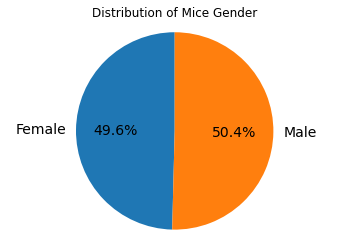

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=sorted(analysis_df["Sex"].unique())
mice_count=cnt_mice

plt.pie(mice_count, labels=gender, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.axis("equal")
plt.title("Distribution of Mice Gender")

plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
sl_reg_df=analysis_df.loc[(analysis_df["Drug Regimen"] == "Capomulin") | (analysis_df["Drug Regimen"] == "Ramicane") |
                          (analysis_df["Drug Regimen"] == "Infubinol") | (analysis_df["Drug Regimen"] == "Ceftamin"),:] 

# Start by getting the last (greatest) timepoint for each mouse
gr_mice_df = sl_reg_df.groupby(["Mouse ID"])

last_tpoint = gr_mice_df["Timepoint"].max()

mice_lpoint_df = pd.DataFrame({"Timepoint": last_tpoint})


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_tumor_df = pd.merge(sl_reg_df, mice_lpoint_df, how="inner", on=["Mouse ID","Timepoint"])

final_tumor_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),UI
0,u153,0,45.000000,0,Ceftamin,Female,11,25,u1530
1,b447,0,45.000000,0,Ceftamin,Male,2,30,b4470
2,x226,0,45.000000,0,Ceftamin,Male,23,28,x2260
3,t573,0,45.000000,0,Ceftamin,Female,15,27,t5730
4,c326,5,36.321346,0,Infubinol,Female,18,25,c3265


In [13]:
# New list of Tumor Volume for:
# Capomulin
capomulin_df = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == "Capomulin","Tumor Volume (mm3)"]


# Calculate the IQR and quantitatively determine if there are any potential outliers.

cap_quartiles = capomulin_df.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

 # Determine outliers using upper and lower bounds
print("Drug Regimen: Capomulin")
print(f"Q1: {cap_lowerq}")
print(f"Q3: {cap_upperq}")    
print(f"IQR: {cap_iqr}")
print(f"Values below {cap_lower_bound} could be outliers")
print(f"Values above {cap_upper_bound} could be outliers")


Drug Regimen: Capomulin
Q1: 32.37735684
Q3: 40.1592203
IQR: 7.781863460000004
Values below 20.70456164999999 could be outliers
Values above 51.83201549 could be outliers


In [14]:
# New list of Tumor Volume for:
# Ramicane
ramicane_df = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == "Ramicane","Tumor Volume (mm3)"]


# Calculate the IQR and quantitatively determine if there are any potential outliers.

ram_quartiles = ramicane_df.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

 # Determine outliers using upper and lower bounds
print("Drug Regimen: Ramicane")
print(f"Q1: {ram_lowerq}")
print(f"Q3: {ram_upperq}")    
print(f"IQR: {ram_iqr}")
print(f"Values below {ram_lower_bound} could be outliers")
print(f"Values above {ram_upper_bound} could be outliers")

Drug Regimen: Ramicane
Q1: 31.56046955
Q3: 40.65900627
IQR: 9.098536719999998
Values below 17.912664470000003 could be outliers
Values above 54.30681135 could be outliers


In [15]:
# New list of Tumor Volume for:
# Infubinal
infubinol_df = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == "Infubinol","Tumor Volume (mm3)"]


# Calculate the IQR and quantitatively determine if there are any potential outliers.

inf_quartiles = infubinol_df.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

 # Determine outliers using upper and lower bounds
print("Drug Regimen: Infubinol")
print(f"Q1: {inf_lowerq}")
print(f"Q3: {inf_upperq}")    
print(f"IQR: {inf_iqr}")
print(f"Values below {inf_lower_bound} could be outliers")
print(f"Values above {inf_upper_bound} could be outliers")

Drug Regimen: Infubinol
Q1: 54.04860769
Q3: 65.52574285
IQR: 11.477135160000003
Values below 36.83290494999999 could be outliers
Values above 82.74144559000001 could be outliers


In [16]:
# New list of Tumor Volume for:
# Ceftamin
ceftamin_df = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == "Ceftamin","Tumor Volume (mm3)"]


# Calculate the IQR and quantitatively determine if there are any potential outliers.

cef_quartiles = ceftamin_df.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

 # Determine outliers using upper and lower bounds
print("Drug Regimen: Ceftamin")
print(f"Q1: {cef_lowerq}")
print(f"Q3: {cef_upperq}")    
print(f"IQR: {cef_iqr}")
print(f"Values below {cef_lower_bound} could be outliers")
print(f"Values above {cef_upper_bound} could be outliers")

Drug Regimen: Ceftamin
Q1: 48.72207785
Q3: 64.29983003
IQR: 15.577752179999997
Values below 25.355449580000002 could be outliers
Values above 87.66645829999999 could be outliers


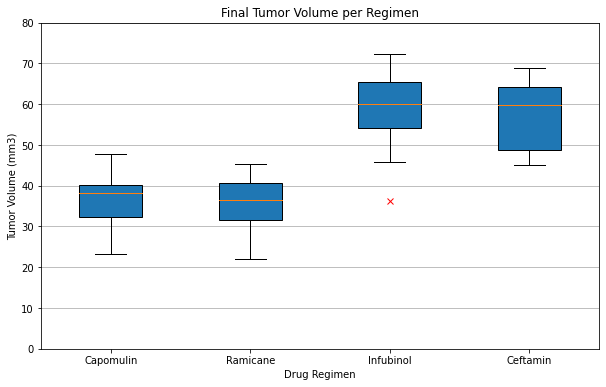

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data = [capomulin_df,ramicane_df,infubinol_df,ceftamin_df]
props = dict(markeredgecolor="r", marker="x")

fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.set_title("Final Tumor Volume per Regimen")
ax1.boxplot(data, flierprops=props, patch_artist=True)
ax1.set_ylim(0,80)
ax1.yaxis.grid(True)
ax1.set_ylabel("Tumor Volume (mm3)")
plt.xticks([1,2,3,4],["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.xlabel("Drug Regimen")

plt.show()

## Line and Scatter Plots

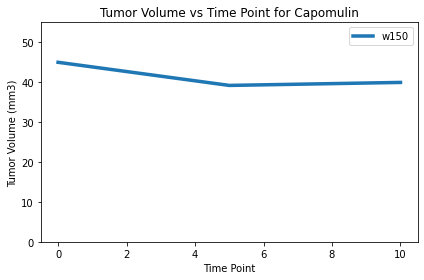

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
columns = ["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]
cap_mice_df=analysis_df.loc[analysis_df["Drug Regimen"] == "Capomulin",:] 

regimen = cap_mice_df["Drug Regimen"].min()
options = cap_mice_df["Mouse ID"].unique()
sample_mice=random.choice(options)

sample_df=cap_mice_df.loc[cap_mice_df["Mouse ID"] == sample_mice,columns]
top_y = sample_df["Tumor Volume (mm3)"].max()

plt.plot(sample_df["Timepoint"],sample_df["Tumor Volume (mm3)"], label=sample_mice, linewidth=3.5)

plt.ylim(0,top_y+10)
plt.title(f"Tumor Volume vs Time Point for {regimen}")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.tight_layout()


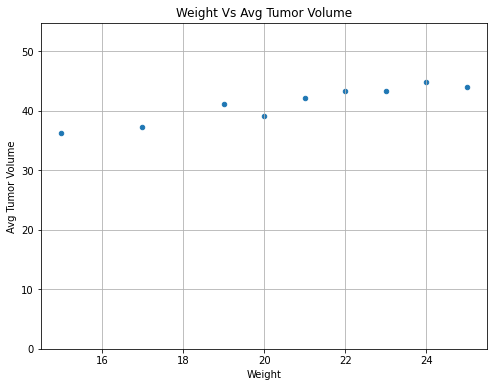

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
gr_capmice_df = cap_mice_df.groupby(["Weight (g)"])

mean_vol = gr_capmice_df["Tumor Volume (mm3)"].mean()
weight = gr_capmice_df["Weight (g)"].min()

scatter_df = pd.DataFrame({"Avg Tumor Volume": mean_vol,
                          "Weight": weight})

scatter_df = scatter_df.reset_index(drop=True)

scatter_df.plot(kind="scatter", x="Weight", y="Avg Tumor Volume", grid=True, figsize=(8,6), title="Weight Vs Avg Tumor Volume")

top_y2=scatter_df["Avg Tumor Volume"].max()
plt.ylim(0,top_y2+10)

plt.show()


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
